# Introduction
The music industry has a massive influence over the lives of many individuals, from artists to producers to fans. It is vital for numerous stakeholders, as it employs nearly 2.5 million people in the United States alone and generates an annual revenue of approximately $170 billion. Understanding the factors that contribute to success in this dynamic industry is imperative for all involved. This study aims to uncover the variables with a relationship to creating popular songs and build a predictive model to classify a song as a "bop" or "not a bop," based on these insights.

# Dataset
The dataset used for this study was sourced from Kaggle and contains 114,000 entries representing unique songs. The attributes of these songs are derived from a Spotify analysis, and the dataset includes 21 features including both quantitative and categorical variables.
One key feature is the popularity score indicating a song's overall success. Through feature engineering, this popularity score will serve as the dependent variable for the study.

The independent variables of interest include quantitative metrics (i.g. danceability and energy, representing a song's rhythm and liveliness), as well as categorical variables like key (the musical key in which the song is composed) and mode (whether the song is in a major or minor scale). These features will be analyzed to determine their contributions to a song's classification as a bop.

| Feature  | Description |
| --- | --- |
| track_id | The Unique Spotify ID for each Track |
| artists  | Names of the artists who performed the track |
| album_name | the name of the album in which the track appears |
| popularity | A value between 0 and 100, indicating the track's popularity based on recent plays |
| duration_ms | The length of the track in milliseconds |
| explicit | Boolean indicating whether the track contains explicit content |
| danceability | Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable) |
| energy | Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy) |
| key | The musical key of the track mapped using standard Pitch Class notation |
| loudness | Overall loudness of the drack in decibels (dB) |
| mode | Indicates the modality (major or minor) of the track |
| speechiness | Detects the presence of spoken words in the track |
| acousticness | Confidence measure of whether the track is acoustice (0.0 = not acoustic, 1.0 = highly acoustice) |
| instrumentalness | Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental) |
| liveness | Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance) |
| valence | Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive) |
| tempo | Estimated tempo of the track in beats per minute (BPM) |
| time_signature | Estimated time signature of the track (3 to 7) |
|track_genre | specific genre associated with each track | under track_genre. under track_genre.

# Pre-processing
## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)

## Import Dataset

In [5]:
df = pd.read_csv('datasets/songs.csv')
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [6]:
df.shape

(114000, 21)

In [7]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
# Evaluate nulls
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
# Summary statistics
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

In [10]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## Quantitative Variable Functions
The preceding cells illustrate general information about the dataset. Notably, only three null values were identified, and these correspond to features that will not be utilized for predicting a song's popularity because with the exception of artists (which experience and established presence have massive influence) album name and track name will not provide insight to a song's popularity.
In the following cell, functions are written to visualize and process quantitative variables.
1. Distribution Visualization:
    * The first function visualizes the distribution of  quantitative variables using a boxplot and a distribution plot. These visualizations allow give insight to each variable's distribution, range and skew.
2. Relationship to the Dependent Variable:
    * The second function visualizes the relationship between the quantitative variables and the dependent variable ('bop'). 
3. Outlier Removal:
    * The final function utilizes the standard interquartile range method to remove outliers. This makes sure extreme values do not influence model performance.

In [12]:
def boxplotVisualize():
    # Visualize quantitative variable distributions
    fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(22, 25))
    fig.suptitle('Quantitative Data Visualizations', fontsize=22)
    
    columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
               'acousticness', 'liveness', 'valence', 'tempo']
    
    for i, column in enumerate(columns):
        even = 2 * (i // 4)
        odd = even + 1
        col = i % 4
        
        # Boxplot
        df.boxplot(column=column, ax=ax[even, col])
        ax[even, col].set_title(f'Boxplot of {column}', fontsize=14)
        ax[even, col].grid(False)
        
        # Distribution plot
        sns.histplot(df[column], kde=True, ax=ax[odd, col])
        ax[odd, col].set_title(f'Distribution of {column}', fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, .98])
    plt.show()

def boxplotVisualizeVsDep():
    # Visualize quantitative variables and their relationship to target variable
    columns = ['duration_ms', 'danceability', 'energy', 
               'loudness', 'speechiness', 'acousticness', 'liveness', 
               'valence', 'tempo']
       
    fig, ax = plt.subplots(3, 3, figsize=(22, 25))
    fig.suptitle("Quantitative Data Vs. 'Bop' Visualizations", fontsize=22)
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(y=col, hue='bop', data=df, ax=ax[i])
        ax[i].set_title(f'Box Plot of {col} vs BOP')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('BOP')
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].legend(title='BOP', labels=['Flop', 'Bop'], loc='upper right')

    for j in range(i + 1, len(ax)): ax[j].axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, .98])
    plt.show()

# Function to remove outliers based on IQR
def removeOutliersIQR(df, column):

    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    
    iqr = q3 - q1
    upperThreshold = q3 + (1.5 * iqr)
    lowerThreshold = q1 - (1.5 * iqr)
    
    df = df[(df[column] <= upperThreshold) & (df[column] >= lowerThreshold)]    
    
    return df

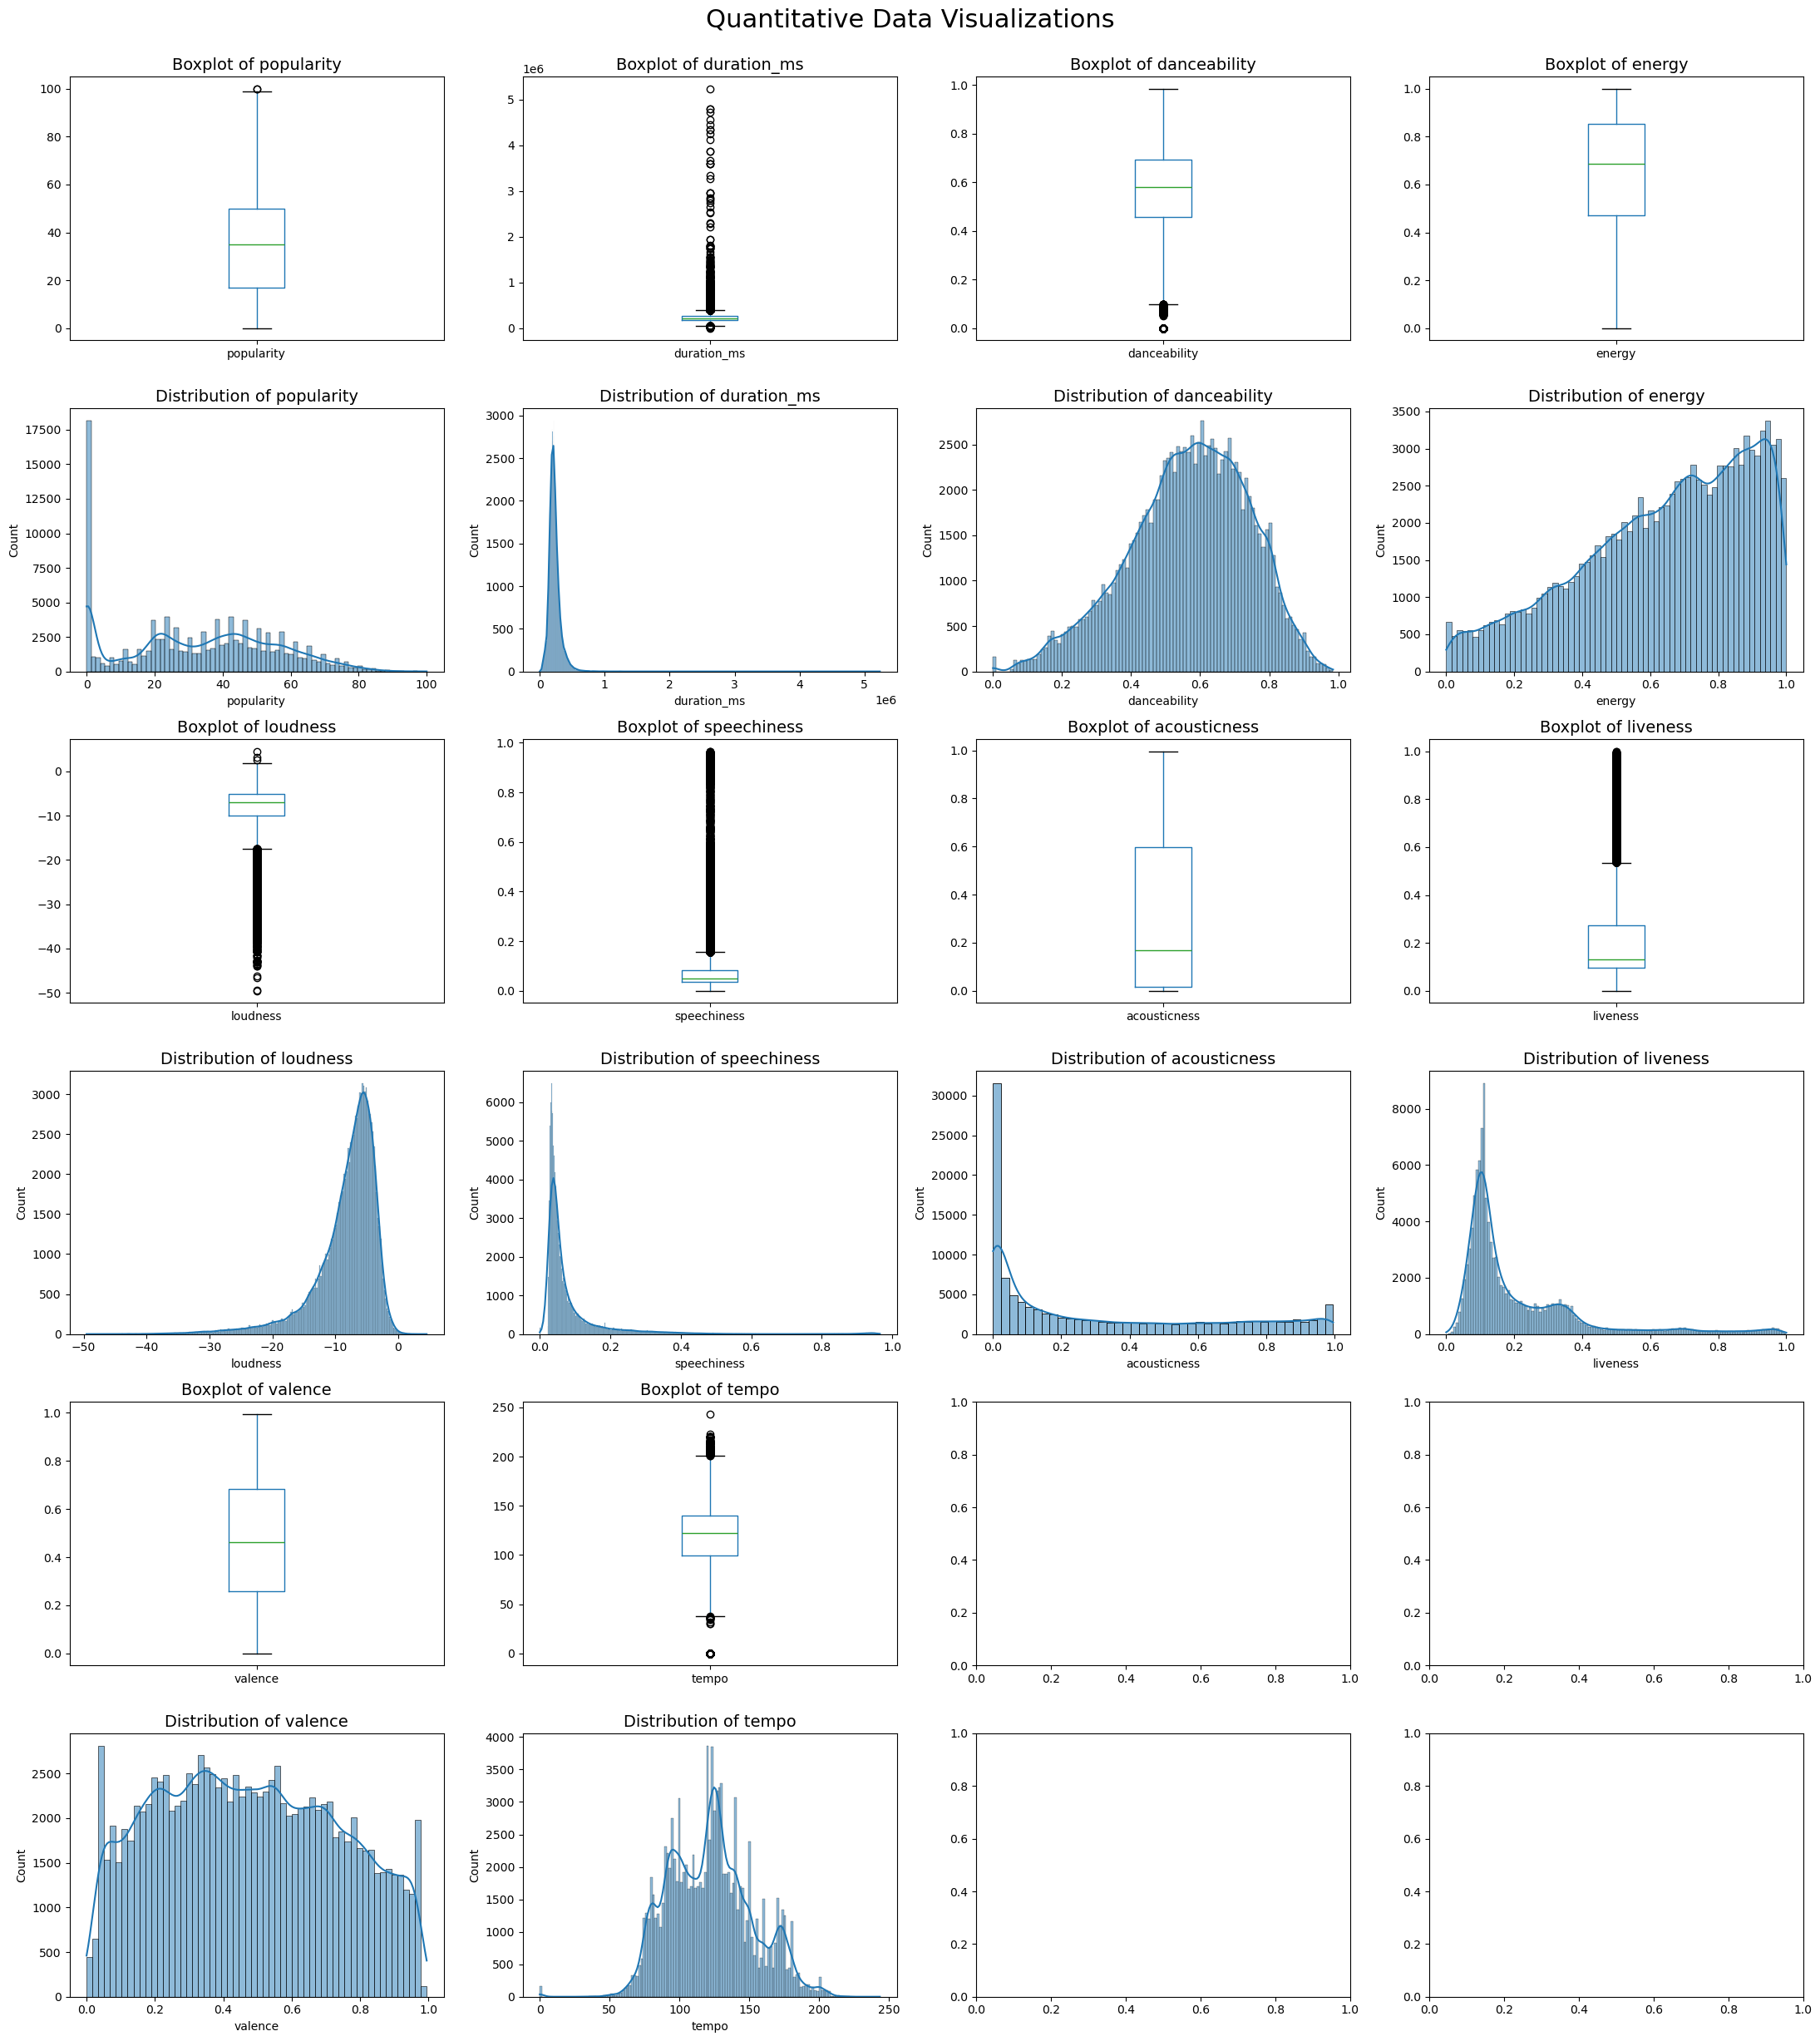

In [13]:
boxplotVisualize()

## Quantitative Variable Visualizations and Processing
The visualizations above illustrate the distribution and skewness of the features in the dataset before any processing.

The function to remove outliers from each quantitative variable is implemented in the following cell. It's important to note that when outliers are removed from one feature, the distribution of another feature may change, potentially creating new outliers. Therefore, this outlier removal process is iteratively performed until all outliers are eliminated from the dataset.

The subsequent visualization illustrates the updated distributions of the quantitative variables after outlier removal, providing insight into how the data has been transformed for more accurate analysis and modeling.

In [15]:
columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'liveness', 'valence', 'tempo']
while True: 
    shape = df.shape
    for col in columns: df = removeOutliersIQR(df, col)
    new_shape = df.shape
    if shape == new_shape: break

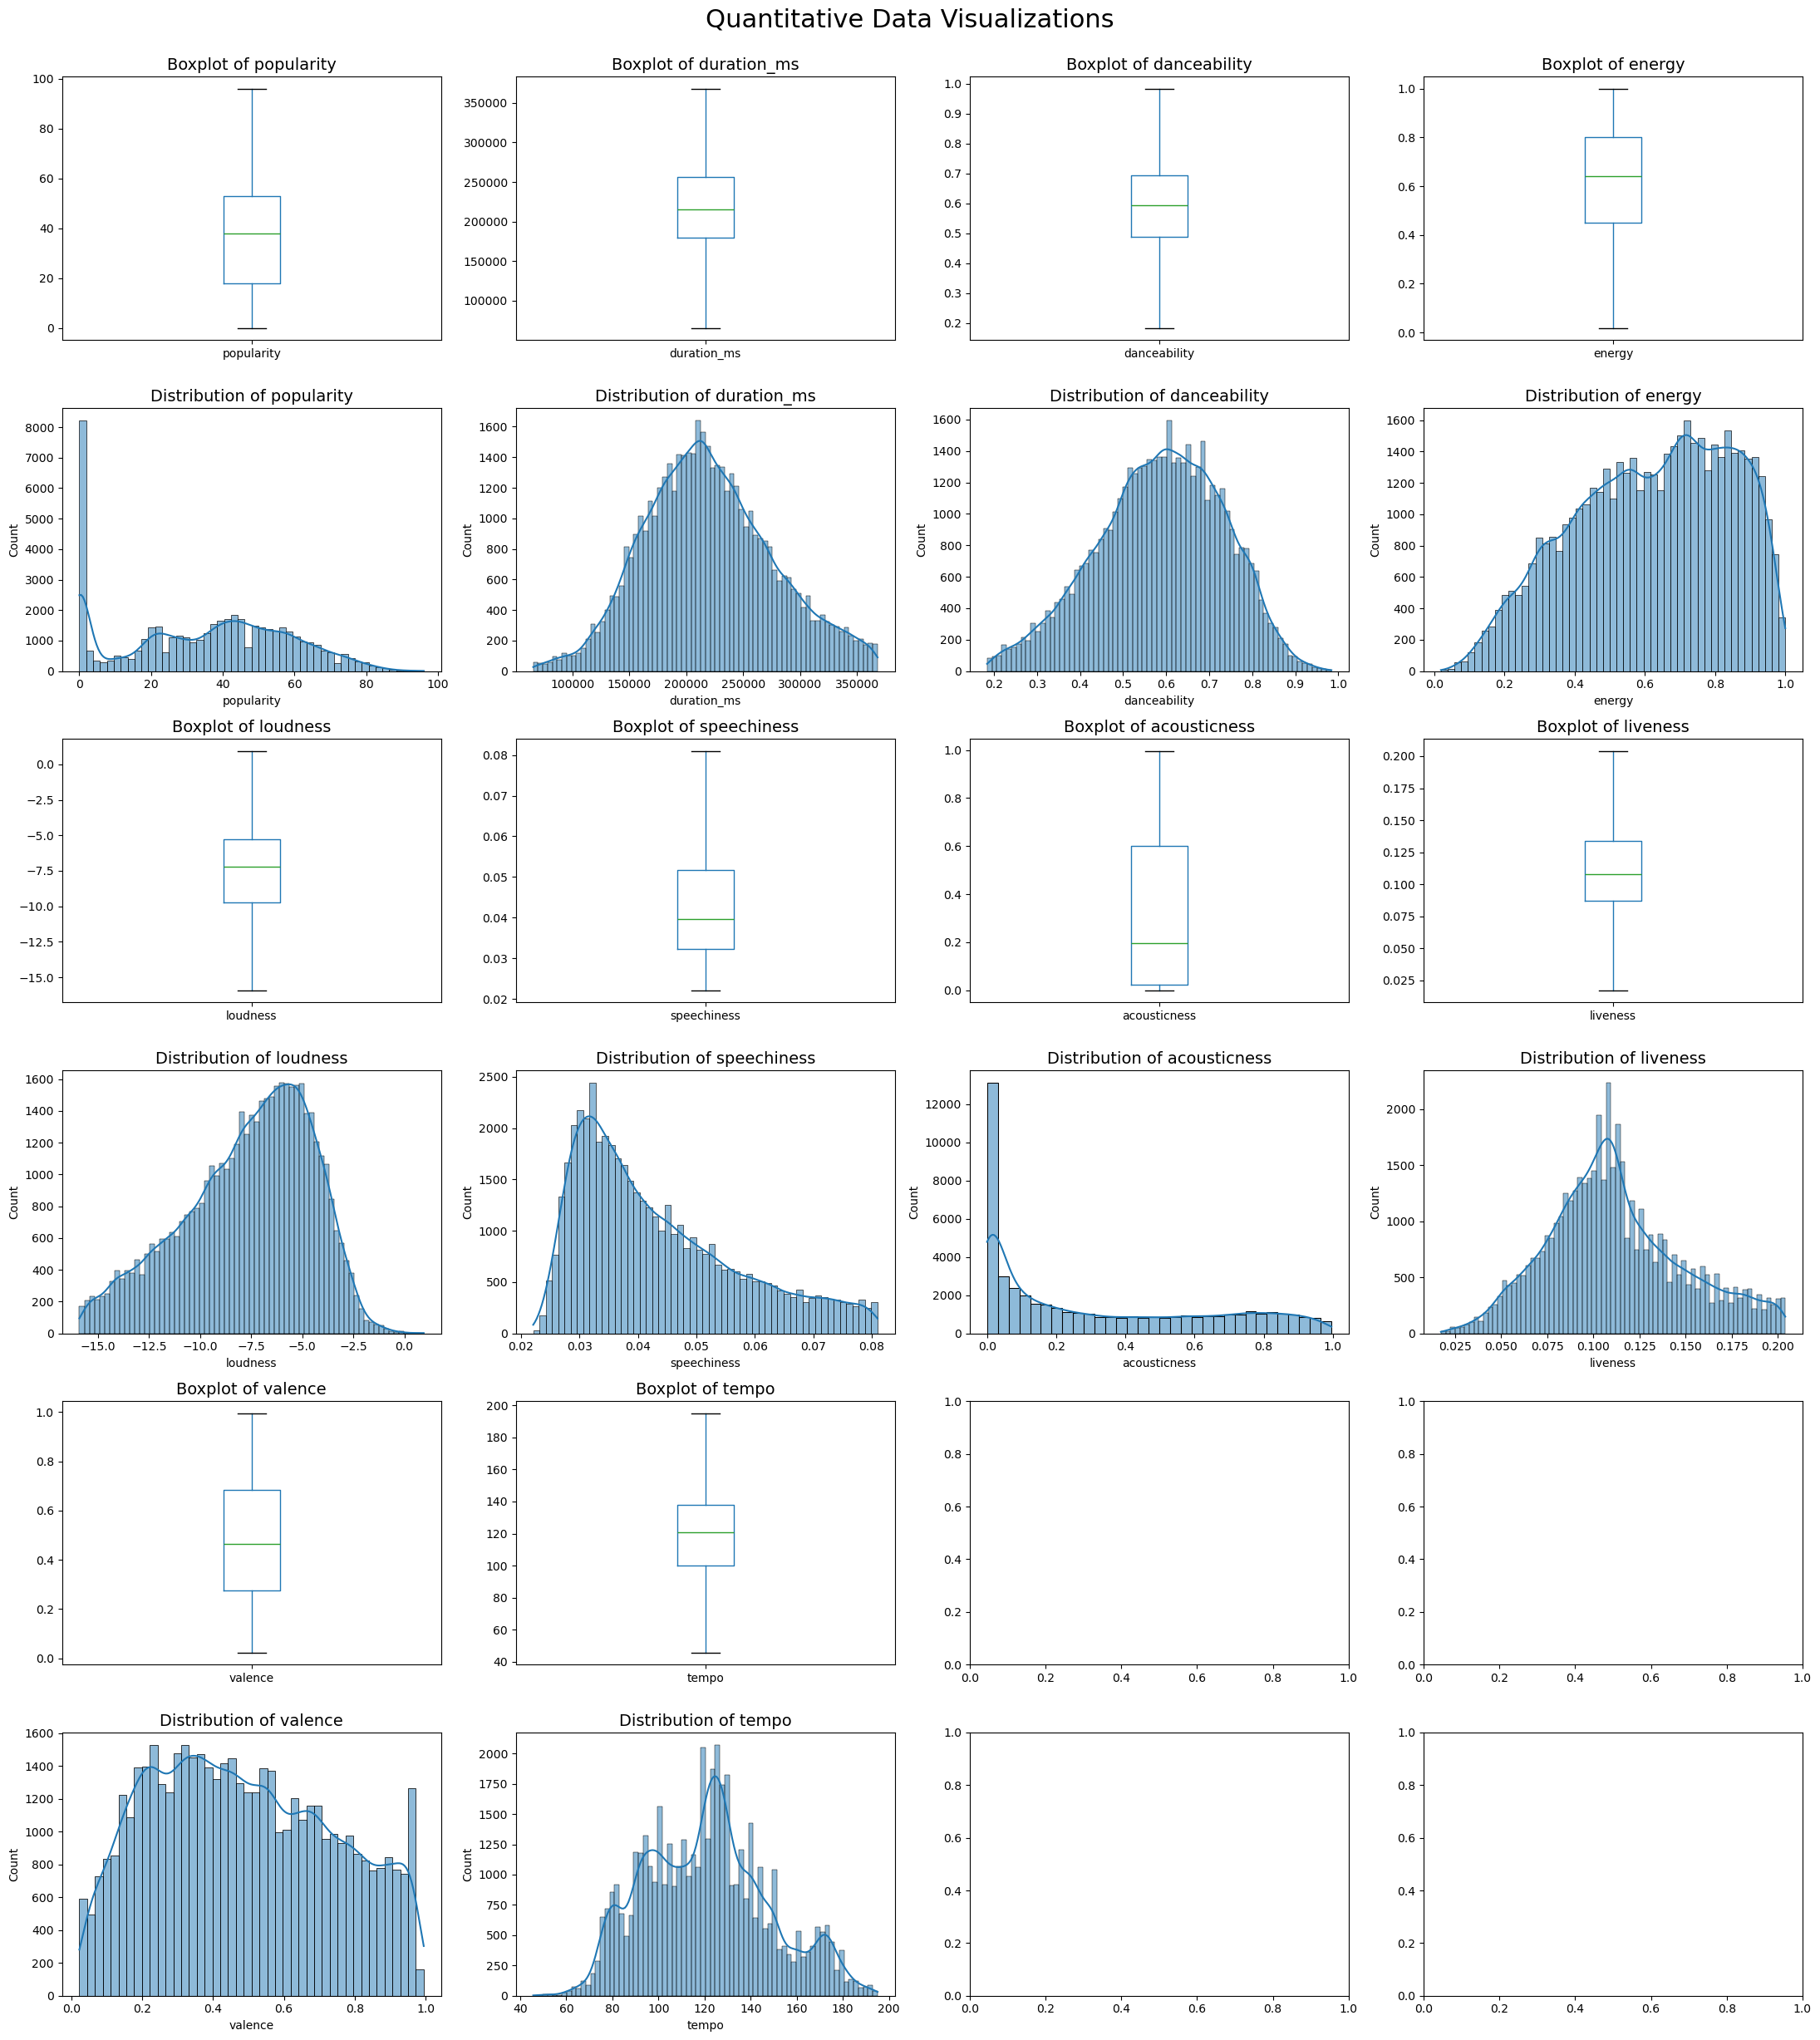

In [16]:
boxplotVisualize()

In [17]:
df.shape

(48164, 21)

## Dependent Variable
In the following cell, the dependent variable is created.  Using the third quartile value of the popularity variable as a threshold, a new categorical variable is created, named 'bop', that assigns a '1' if the entry has a popularity score greater than or equal to 75% of the data and '0' otherwise.

In [19]:
threshold = df['popularity'].quantile(0.75)
df['bop'] = np.where(df['popularity'] >= threshold, 1, 0)

In [20]:
cat_cols = []
for col in df.columns:
    if col not in columns: cat_cols.append(col)
cat_cols = cat_cols[5:]
cat_cols.remove('instrumentalness')
cat_cols

['explicit', 'key', 'mode', 'time_signature', 'track_genre', 'bop']

## Categorical Variable Functions
The following cell includes three functions designed to visualize and balance the categorical variables in the dataset:
1. Count Visualization of Classes:
    * The first function visualizes the count of each class for categorical variables, providing an overview of the distribution.
2. Count Visualization Relative to 'Bop':
    * The second function visualizes the count of each class for categorical variables in relation to the 'bop' classifications.
3. Resampling Function:
    * The third function is used to resample specific classes within the categorical variables. This balances the distribution of classes, improving the model's performance and robustness.

In [22]:
def visualizeCatCols():
    # Visualize distribution of categorical variables
    cat_cols = ['explicit', 'mode', 'bop', 'key', 'time_signature']
    fig, ax = plt.subplots(2, 3, figsize=(22, 13))
    fig.suptitle('Categorical Data Counts', fontsize=22)
    
    # Plot first row
    for i in range(3):
        sns.countplot(x=cat_cols[i], data=df, ax=ax[0, i]).set(title=f'Distribution of {cat_cols[i]}', ylabel='Count')
        ax[0, i].spines['top'].set_visible(False)
        ax[0, i].spines['right'].set_visible(False)
    
    # Plot second row
    for i in range(2):
        sns.countplot(x=cat_cols[i + 3], data=df, ax=ax[1, i]).set(title=f'Distribution of {cat_cols[i + 3]}', ylabel='Count')
        ax[1, i].spines['top'].set_visible(False)
        ax[1, i].spines['right'].set_visible(False)
    
    ax[1, 2].axis('off')
    
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9)
    plt.show()

def visualizeCatColsVsDep():
    # Visualize the distribution of categorical variables in relation to the target variable
    cat_cols = ['explicit', 'mode', 'bop', 'key', 'time_signature']
    fig, ax = plt.subplots(2, 3, figsize=(22, 13))
    fig.suptitle("Categorical Data Counts Vs. 'Bop'", fontsize=22)

    
    # Plot first row
    for i in range(3):
        sns.countplot(x=cat_cols[i], data=df, ax=ax[0, i], hue=df['bop']).set(title=f'Distribution of {cat_cols[i]}', ylabel='Count')
        ax[0, i].spines['top'].set_visible(False)
        ax[0, i].spines['right'].set_visible(False)
        ax[0, i].legend(title='BOP', labels=['Flop', 'Bop'])
    
    # Plot second row
    for i in range(2):
        sns.countplot(x=cat_cols[i + 3], data=df, ax=ax[1, i], hue=df['bop']).set(title=f'Distribution of {cat_cols[i + 3]}', ylabel='Count')
        ax[1, i].spines['top'].set_visible(False)
        ax[1, i].spines['right'].set_visible(False)
        ax[1, i].legend(title='BOP', labels=['Flop', 'Bop'])
    
    ax[1, 2].axis('off')
    
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9)
    plt.show()

def resample(df, column, value, n, random_state=42):
    # Function to aid in resamplind dataset to even out distributions
    to_resample = df.loc[df[column] == value]
    our_resample = to_resample.sample(n = n, replace = True, random_state=random_state)
    df = pd.concat([df, our_resample])
    return df

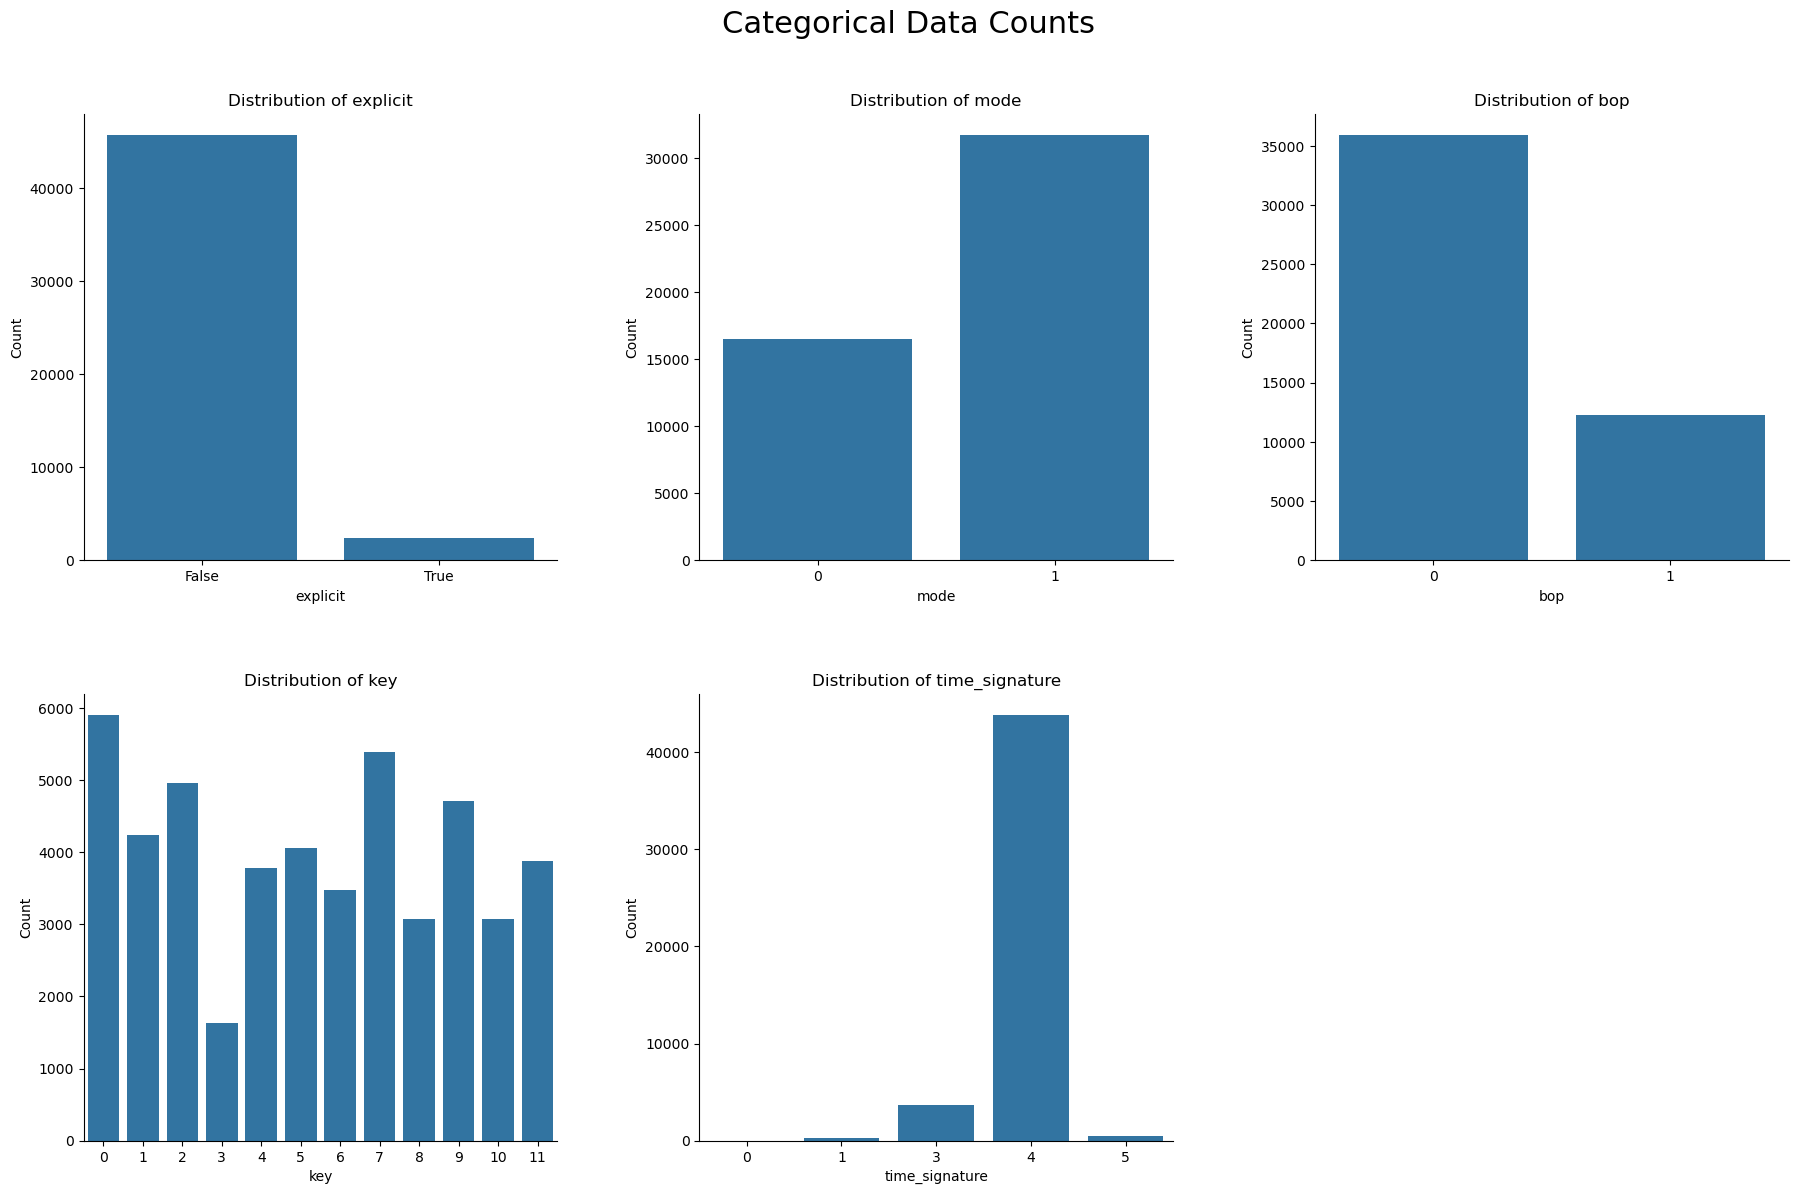

In [23]:
visualizeCatCols()

## Categorical Variable Visualizations and Processing
The previous cell illustrated the unprocessed distribution of categories in the dataset. Upon review, it was determined that the distributions of the explicit and time_signature variables are heavily skewed toward one category. As a result, these variables will not be included in this analysis.

To address the issue of imbalanced representation, the following cell resamples categories with low representation. This process aims to even out the distributions.

The following cell visualizes the newly balanced distributions.

In [25]:
df = resample(df, 'bop', 1, 23678)
df = resample(df, 'mode', 0, 21768)
df = resample(df, 'key', 3, 6900)
df = resample(df, 'key', 8, 4500)
df = resample(df, 'key', 10, 3300)
df = resample(df, 'key', 6, 2700)
df = resample(df, 'key', 4, 2000)
df = resample(df, 'key', 5, 1800)
df = resample(df, 'key', 11, 1800)
df = resample(df, 'key', 1, 1470)
df = resample(df, 'key', 2, 1319)
df = resample(df, 'key', 9, 1182)
df = resample(df, 'key', 7, 733)

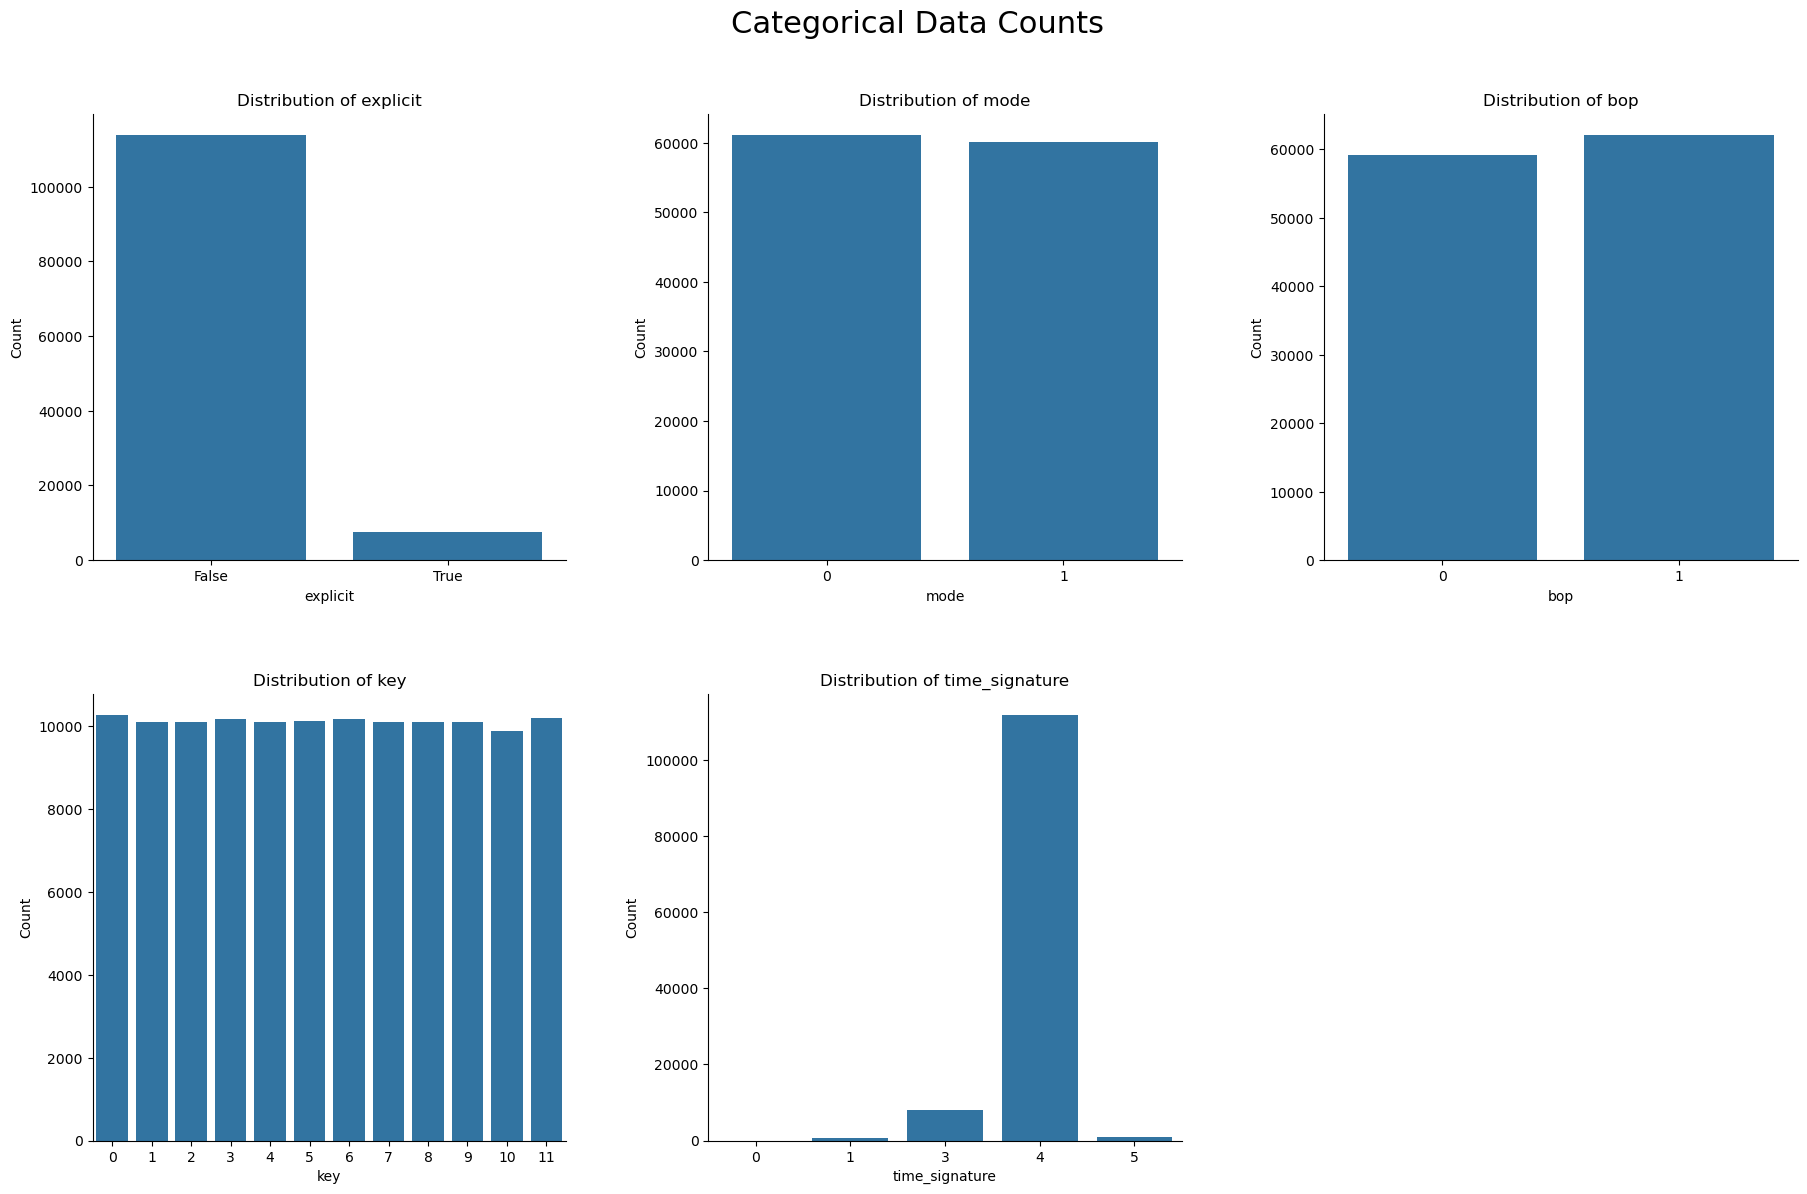

In [26]:
visualizeCatCols()

# Data Understanding
The following visualizations illustrate the relationships of the features in relation to the Bop variable.

From the categorical variable plots, we observe that the distribution of the mode feature indicates a slightly higher representation of bops in major keys compared to flops. This suggests that songs in a major key are more likely to be classified as popular. Also, specific keys, such as 1 (C#) and 3 (D#), show a positive relationship between these keys and the likelihood of a song being classified as a 'bop'.

In the quantitative variable boxplots, higher values of danceability and loudness correlate with a greater likelihood of a song being classified as a bop.

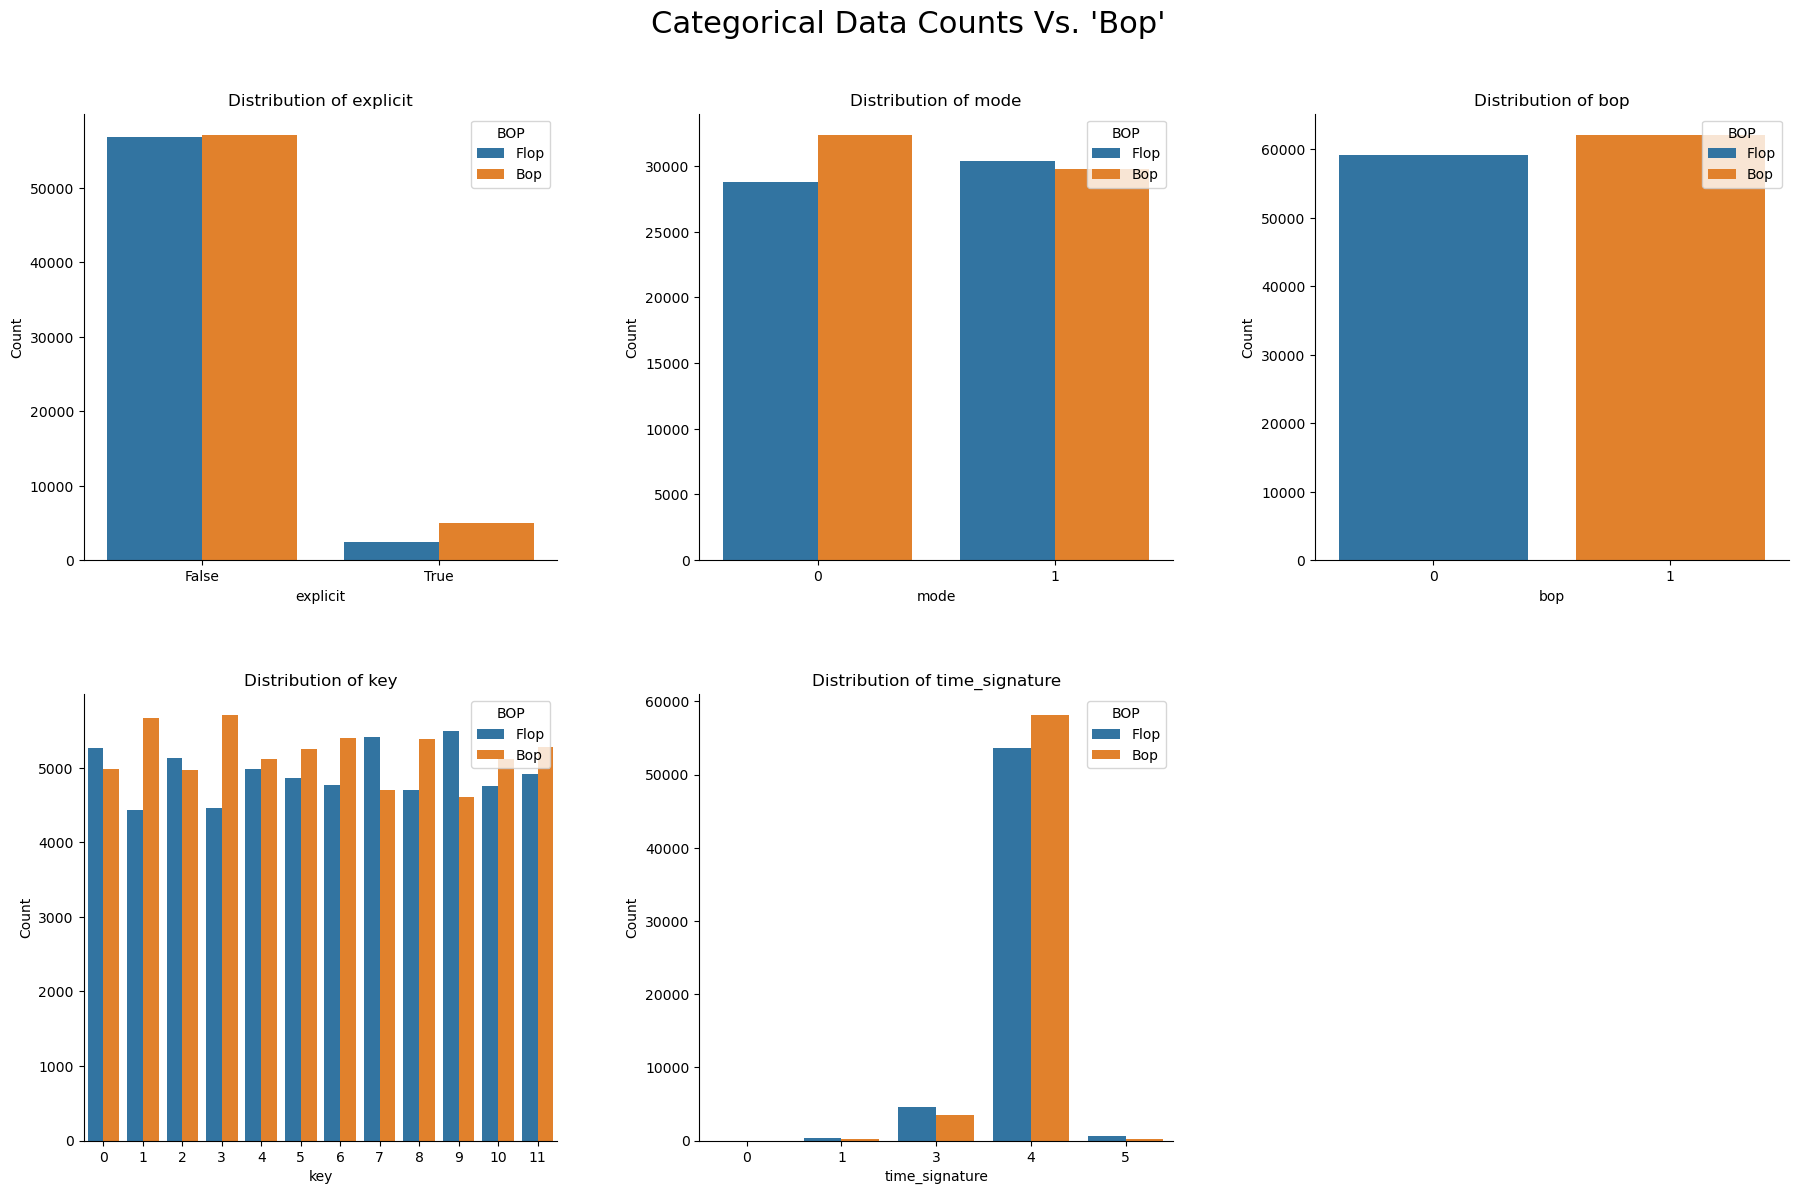

In [28]:
visualizeCatColsVsDep()

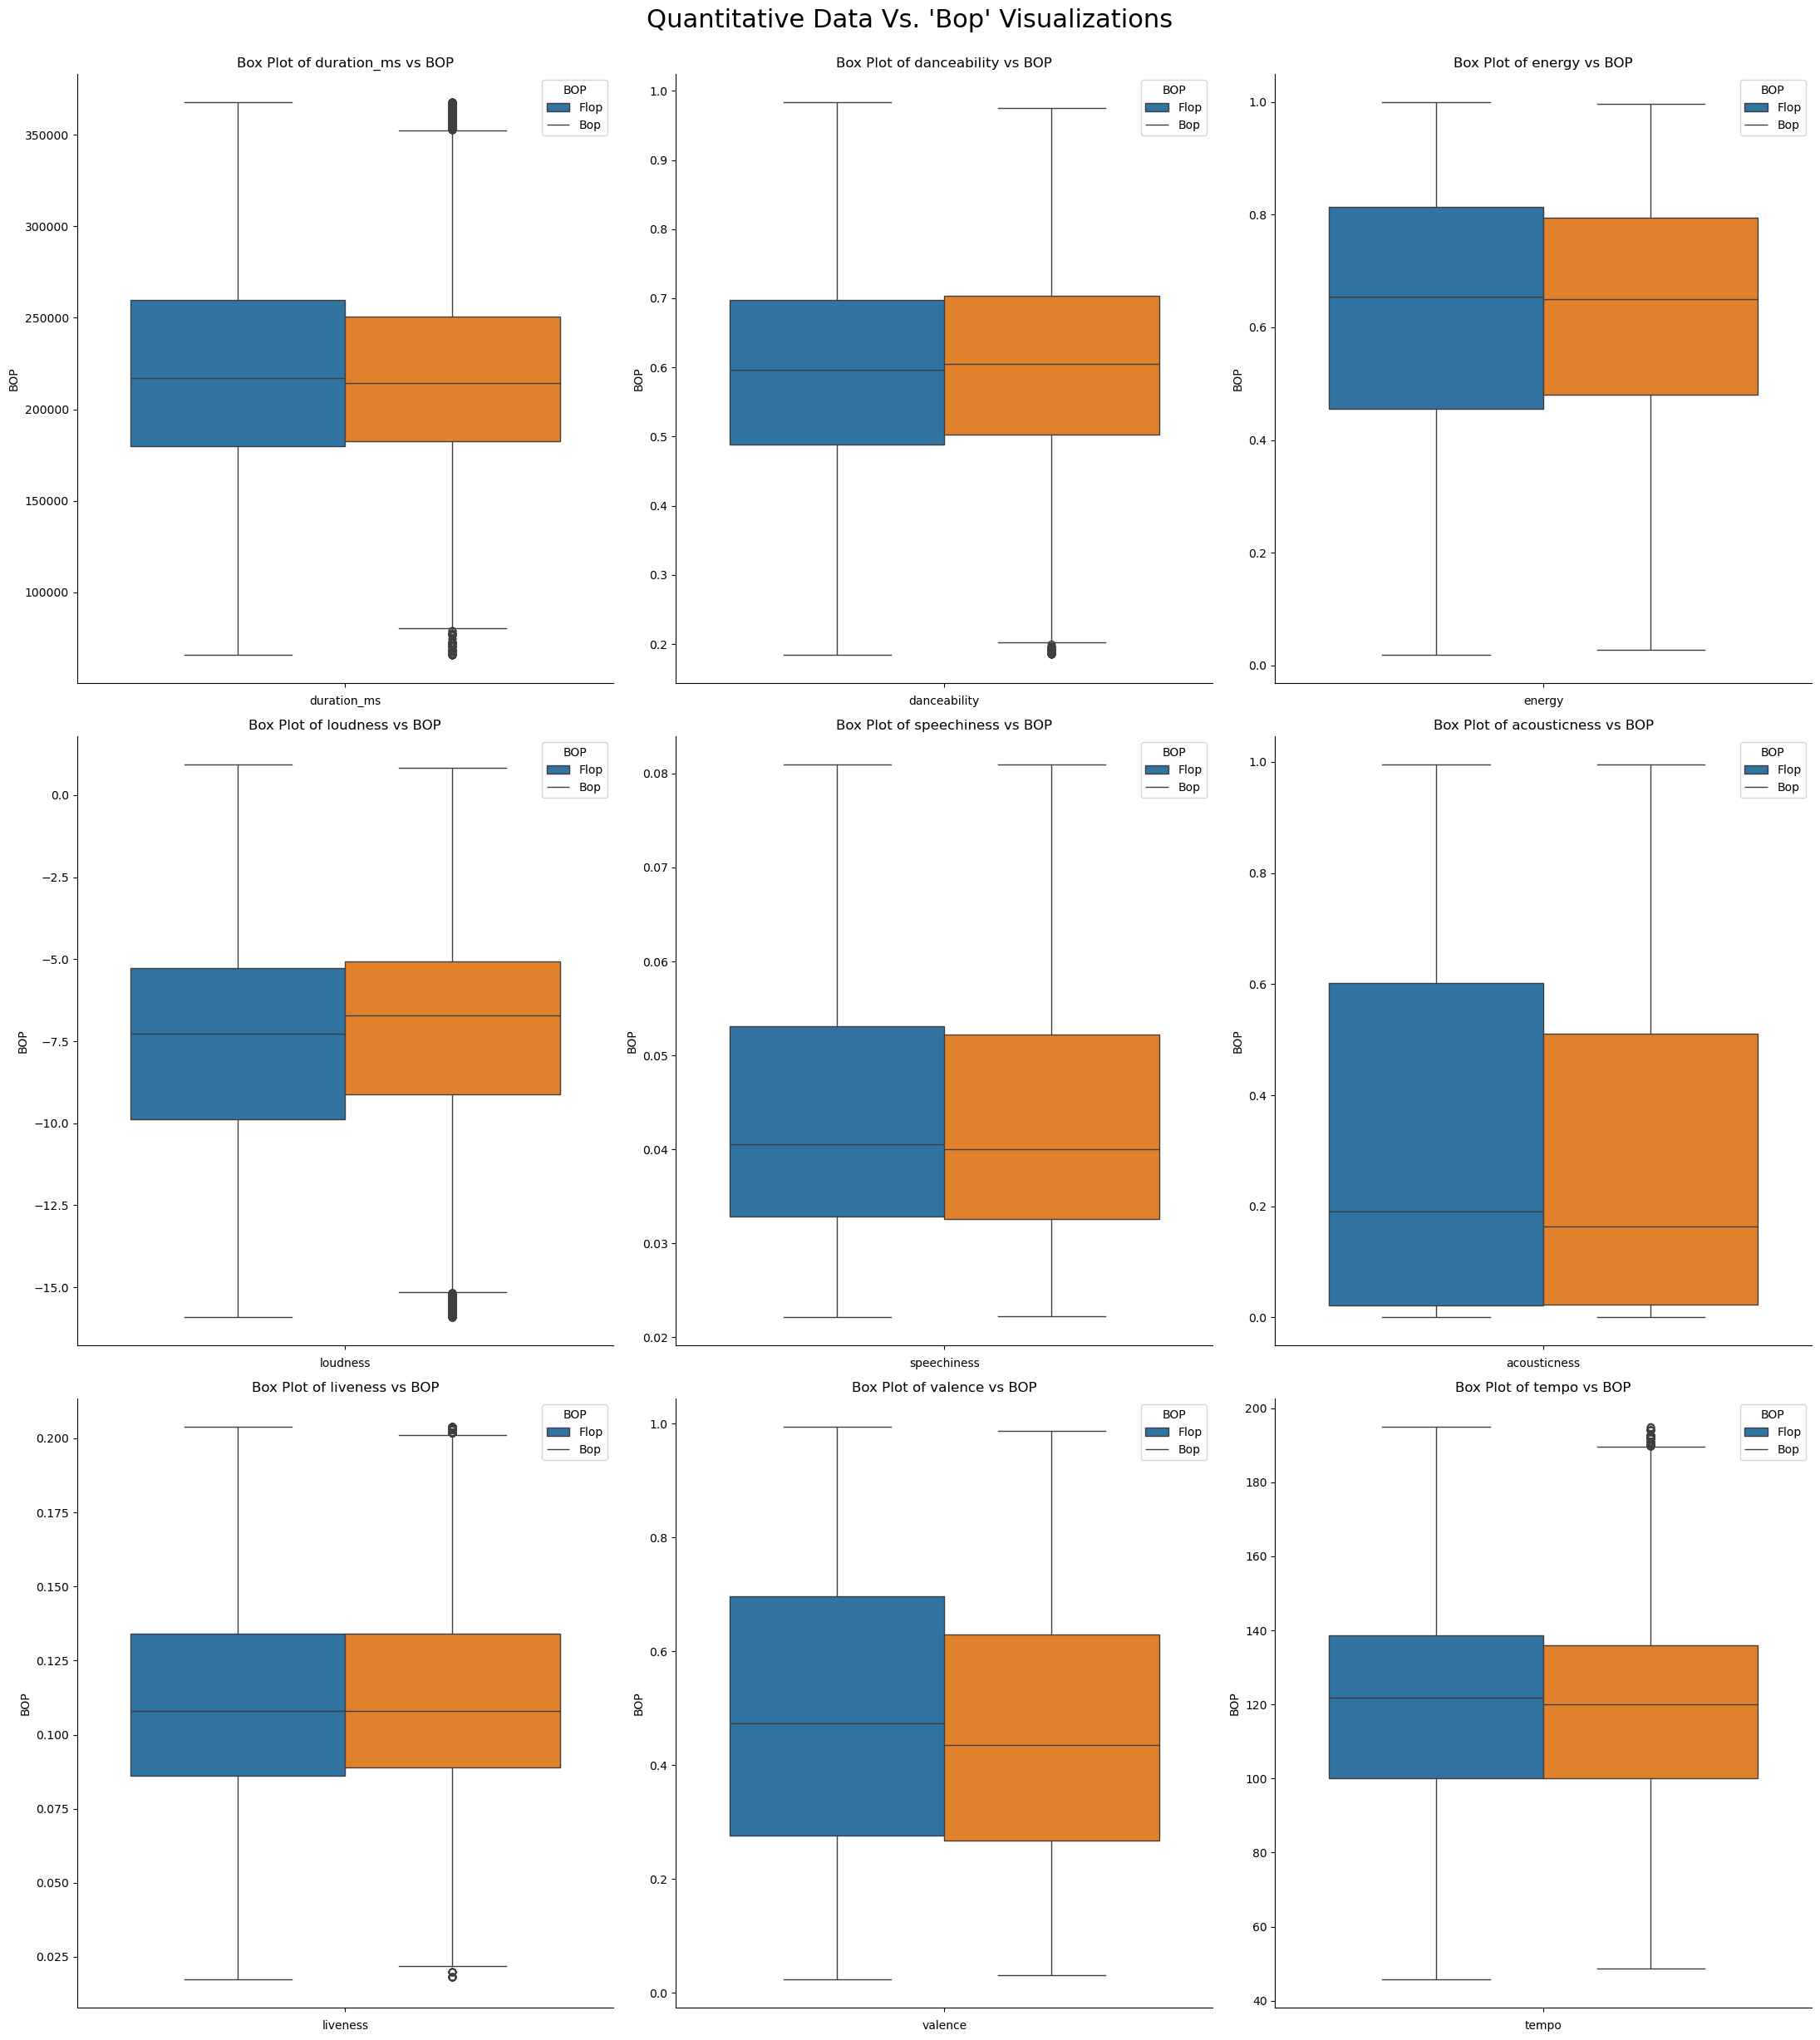

In [29]:
boxplotVisualizeVsDep()

# Modeling
The following four cells prepare the dataset for modeling:

1. Creation of Dummy Variables:
    * Dummy variables are generated for categorical features to allow for their evaluation within the model. This converts categorical data ensuring that each category is represented as a binary (0 or 1).

2. Dropping Irrelevant Columns:
    * Columns that are not relevant to the modeling process are dropped from the dataset.

3. Splitting Data into Predictor and Target Variables:
    * The dataset is divided into variables of interest (X) and the target variable (y, the 'bop' feature).

4. Creating Training and Testing Datasets:
    * The data is further split into training and testing sets. The training set is used to train the model, while the testing set is used for evaluation.

In [31]:
# One-hot encoding 
df = pd.get_dummies(df, columns=['key'], prefix='key')

In [32]:
df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 
                 'popularity', 'explicit', 'track_genre', 'time_signature'], axis=1, inplace=True)

In [33]:
df.head()

duration_ms  danceability  energy  loudness  mode  speechiness  \
2       210826         0.438   0.359    -9.734     1       0.0557   
4       198853         0.618   0.443    -9.681     1       0.0526   
6       229400         0.407   0.147    -8.822     1       0.0355   
7       242946         0.703   0.444    -9.331     1       0.0417   
8       189613         0.625   0.414    -8.700     1       0.0369   

   acousticness  instrumentalness  liveness  valence    tempo  bop  key_0  \
2         0.210          0.000000    0.1170   0.1200   76.332    1   True   
4         0.469          0.000000    0.0829   0.1670  119.949    1  False   
6         0.857          0.000003    0.0913   0.0765  141.284    1  False   
7         0.559          0.000000    0.0973   0.7120  150.960    1  False   
8         0.294          0.000000    0.1510   0.6690  130.088    1   True   

   key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  \
2  False  False  False  False  False  False  False  False  False   False   
4  False   True  False  False  False  False  False  False  False   False   
6  False   True  False  False  False  False  False  False  False   False   
7  False  False  False  False  False  False  False  False  False   False   
8  False  False  False  False  False  False  False  False  False   False   

   key_11  
2   False  
4   False  
6   False  
7    True  
8   False

In [34]:
X = df.drop(columns=['bop'])
y = df['bop']
# Create train and test sets for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier
Random Forest Classifiers are an ensemble modeling technique utilizing a specified number of decision trees to predict a classification for a categorical variable. The process works as follows:

1. Ensemble Methodology:
    * A random forest is a collection of decision trees, trained on differing subsets of the data. When making a prediction, data is passed to each tree, and the final prediction is determined by the majority.

2. Tree Generation:
    * To create a decision tree, each feature is evaluated to identify which one best facilitates a split based on the Gini Index. The resulting splits create paths, and the decisions made at these splits are considered nodes.

3. Leaf Nodes:
    * The final node at the end of a path is named a leaf node. Leaf nodes represent the final prediction.

#### Advantages and Considerations
* Categorical Predictions: Random Forest Classifiers are used for predicting categorical target variables. They are generally robust against various variable ranges and magnitudes, eliminating the need for normalization or standardization.

* Sensitivity to Imbalance: Random Forests can be sensitive to imbalances in the dataset. This is why resampling techniques were used to even out the distribution of categorical classes in this analysis.

* Overfitting Risks: One downside to Random Forests is their potential for overfitting, particularly if no limits are inplace on parameters like tree depth, the minimum number of samples required to create a split, or the minimum number of samples necessary at a leaf node. Without setting minimums, the trees can become overly complex, effectively memorizing the training data.

#### Mitigation Strategies
To minimize the risk of overfitting the data, techniques like grid search and cross-validation are used. In this analysis, we utilize:

* Cross-Validation: Dividing the datasets into multiple folds ensures that the model’s performance is more robust than training on a single fold.

* Grid Search: This technique iteratively searchbuilds models with different hyperparameters to find the best model.

The following cells implement a Random Forest Classifier to model the relationships in the training data, using cross-validation and grid search to create a more robust model while minimizing overfitting.

In [36]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10],
    'max_depth': [30],
    'min_samples_split': [.02],
    'min_samples_leaf': [300],
    'bootstrap': [False]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [30],
                         'min_samples_leaf': [300], 'min_samples_split': [0.02],
                         'n_estimators': [10]},
             verbose=2)

In [37]:
# Display the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 300, 'min_samples_split': 0.02, 'n_estimators': 10}


In [38]:
# Display the shape of each tree in the forest
best_rf = grid_search.best_estimator_

# Function to display size and shapes of trees in Random Forest
def displayTreeAttributes():
    tree_metrics =[]
    
    for i, tree in enumerate(best_rf.estimators_):
        metrics = {
            'tree_index': i,
            'depth': tree.get_depth(),
            'num_leaves': tree.get_n_leaves(),
            'num_nodes': tree.tree_.node_count,
        }
        tree_metrics.append(metrics)
    
    tree_metrics_df = pd.DataFrame(tree_metrics)
    
    print(tree_metrics_df)
    
displayTreeAttributes()

   tree_index  depth  num_leaves  num_nodes
0           0     20          95        189
1           1     18         105        209
2           2     17          99        197
3           3     21         101        201
4           4     22          92        183
5           5     18         102        203
6           6     16          97        193
7           7     17          96        191
8           8     20          94        187
9           9     23          97        193


In [39]:
# Visualize first tree of the random forest
plt.figure(figsize=(125, 100))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, filled=True, fontsize=10)
plt.title("First Tree of the Random Forest")
plt.show()

### Summary
The preceding model went through multiple iterations, utilizing hyperparameter tuning.

Initially, the generated forests had extremely high evaluation metrics. However, the complexity of the trees was too extensive for interpretation, with some trees containing as many as 17,000 nodes. To address this issue, the following hyperparameters were adjusted:

* Minimum Samples for Splits: The minimum number of samples required to create a split was set to 2% of the total number of samples in the dataset.

* Minimum Samples for Leaf Nodes: The minimum number of samples necessary for a leaf node was established at 300.

These adjustments resulted in a more manageable and interpretable model while increasing robustness.

In [40]:
# Make predictions using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63     11950
           1       0.64      0.71      0.68     12313

    accuracy                           0.65     24263
   macro avg       0.65      0.65      0.65     24263
weighted avg       0.65      0.65      0.65     24263



# Evaluation
The table above shows the evaluation metrics of the model applied to the testing dataset.

* Precision Scores: The model correctly predicted non-bops 67% of the time, meaning 67% of predictions labeled as non-bops were accurate. However, 33% of these predictions were false positives, where actual bops were misclassified as non-bops. Also, the model correctly predicted bops 64% of the time, while 36% were false positives, where non-bops were incorrectly classified as bops.

* Recall Rates: In terms of recall, the model identified 59% of actual non-bops, with 41% classified incorrectly as bops (false negatives). For bops, the model demonstrated a recall of 71%, successfully identifying 71% of actual bops, while 29% were misclassified as non-bops.

These scores indicate that the model performs better at predicting bops than non-bops, suggesting a tendency for more false positives in non-bop predictions.

* Overall Accuracy: The model's overall accuracy is 65%, meaning it correctly predicted 65% of the testing dataset, reflecting moderate performance.
Since the dataset has balanced representation of bops and non-bops the accuracy score suggests significant relationships between the predictor variables and the target variable.

# Storytelling
Through this analysis, valence, duration, and instrumentalness were learned to be the strongest predictors of a song's popularity.  This is observed through the visualization of the first decision tree in the random forest. While the model's performance is not as high as one would prefer, The accuracy indicates significant relationships between predictor variables and their correlation with whether a song falls in the top 25% of popularity.

This exploration has answered my initial question about which features are influential in determining a song's status as a bop.

In the future, I would focus on expanding the variables of interest. For instance, including track genre could provide better insights. The genre labels of the dataset were highly specific in many cases with many different labels. Also, the distribution of labels were very unbalanced, but focusing on those with the highest representation could strengthen the model's performance. Additionally, exploring the relationship between popularity and the sex of the lead vocalist could yield valuable insights. Narrowing down the dataset to subsets of tracks with high success rates will allow for a more robust model and clearer understanding of the factors that contribute to a song's success in the competitive music landscape.

# Impacts
The development of a predictive model for a song's popularity could have significant positive and negative consequences for the music industry and adjacent fields.

### Positive Consequences
1. Increased Success in the Music Industry:
    * By identifying the characteristics that contribute to a song’s popularity, artists and producers can tailor their music to align with listener preferences, potentially leading to more successful releases.
2. Growth in Adjacent Industries:
    * Industries related to music, such as instrument retailers and educational music programs, could also benefit from increased popularity. As more songs achieve commercial success, demand for musical instruments and education is likely to rise.
3. Job Creation:
    * An influx of popular music may lead to more jobs and opportunities within the industry, from production and marketing to talent development and live performances.
### Negative Consequences
1. Decreased Diversity in Music:
    * One of the significant risks of focusing solely on factors that drive popularity is a potential decrease in musical diversity. If the model encourages creators to replicate the traits of successful songs, it may stifle innovation and lead to a homogenization of music.
2. Impact on Emerging Artists:
    * Emerging artists or those who prefer non-mainstream genres might find it increasingly challenging to gain visibility and opportunities. The emphasis on popular trends could marginalize unique voices and artistic expressions, limiting the diversity of music available to listeners.
3. Pressure on Artists:
    * Artists may feel pressured to conform to the model's predictions, potentially compromising their creative integrity for the sake of commercial success.

In summary, while a predictive model for song popularity can enhance success and create opportunities in the music industry, it is essential to remain mindful of the potential downsides, including reduced diversity and the impact on emerging artists. Balancing commercial interests with artistic expression will be crucial to fostering a vibrant and inclusive music landscape.

# References
https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs